In [1]:
import pandas as pd

In [232]:
data = pd.read_csv("dynamic_pricing.csv")
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [233]:
data.shape

(1000, 10)

# Company demand features meaning

A ride-sharing company wants to implement a dynamic pricing strategy to optimize fares based on real-time market conditions. The company only uses ride duration to decide ride fares currently. The company aims to leverage data-driven techniques to analyze historical data and develop a predictive model that can dynamically adjust prices in response to changing factors.

The dataset containing historical ride data has been provided. It includes features such as the number of riders, number of drivers, location category, customer loyalty status, number of past rides, average ratings, time of booking, vehicle type, expected ride duration, and historical cost of the rides.

Your goal is to build a dynamic pricing model that incorporates the provided features to predict optimal fares for rides in real-time. The model must consider factors such as demand patterns and supply availability.


Features:
Number_of_Riders - Total riders looking for a ride at a given time (higher demand increases price).
Number_of_Drivers - Available drivers at a given time (lower supply increases price).
Location_Category - Area type (urban, suburban, rural) affecting demand and pricing.
Customer_Loyalty_Status - Loyalty level of the customer (higher loyalty may get discounts).
Number_of_Past_Rides - Total rides taken by the customer (more rides may get better pricing).
Average_Ratings - Customer's average rating (higher rating may get better treatment).
Time_of_Booking - Time when the ride is booked (peak hours increase price).
Vehicle_Type - Type of vehicle chosen (luxury cars have higher pricing).
Expected_Ride_Duration - Estimated ride duration (longer rides cost more).
Historical_Cost_of_Ride - Past ride prices for similar trips (helps predict future pricing).







In [234]:
df = data

#Data Cleaning – Handle missing values, duplicates, and inconsistencies.

In [235]:
df.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

there is no null values in any feature

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


all datatypes are already correct

First, we will rename the features to make them easier to understand.

In [237]:
df.rename(columns={
    'Number_of_Riders': 'Total_Riders',
    'Number_of_Drivers': 'Total_Drivers',
    'Location_Category': 'Area_Type',
    'Customer_Loyalty_Status': 'Customer_Loyalty_Status',
    'Number_of_Past_Rides': 'Customer_Past_Rides',
    'Average_Ratings': 'Customer_Rating',
    'Time_of_Booking': 'Booking_Time',
    'Vehicle_Type': 'Car_Type',
    'Expected_Ride_Duration': 'Ride_Duration',
    'Historical_Cost_of_Ride': 'Ride_Cost'
}, inplace=True)

In [238]:
df.head()

,Total_Riders,Total_Drivers,Area_Type,Customer_Loyalty_Status,Customer_Past_Rides,Customer_Rating,Booking_Time,Car_Type,Ride_Duration,Ride_Cost
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [239]:
# Round off the 'Ride_Cost' column to 2 decimal places and 'Customer_Rating' into 0
df['Ride_Cost'] = df['Ride_Cost'].round(2)
df['Customer_Rating'] = df['Customer_Rating'].round()
df.head(1)

,Total_Riders,Total_Drivers,Area_Type,Customer_Loyalty_Status,Customer_Past_Rides,Customer_Rating,Booking_Time,Car_Type,Ride_Duration,Ride_Cost
0,90,45,Urban,Silver,13,4.0,Night,Premium,90,284.26


Now, we will check the relationship between numeric columns and the price (Ride_Cost).

We will also analyze the correlation to ensure that no independent feature has a strong positive correlation with another independent feature (to avoid multicollinearity).

In [240]:
numeric_cols = df.select_dtypes(include=['number'])
correlation_matrix = numeric_cols.corr()
correlation_matrix

,Total_Riders,Total_Drivers,Customer_Past_Rides,Customer_Rating,Ride_Duration,Ride_Cost
Total_Riders,1.000000,0.627016,0.029265,0.030832,-0.015856,0.005825
Total_Drivers,0.627016,1.000000,0.039660,0.072737,-0.024418,0.017081
Customer_Past_Rides,0.029265,0.039660,1.000000,-0.035056,0.030679,0.035859
Customer_Rating,0.030832,0.072737,-0.035056,1.000000,0.012248,0.040323
Ride_Duration,-0.015856,-0.024418,0.030679,0.012248,1.000000,0.927547
Ride_Cost,0.005825,0.017081,0.035859,0.040323,0.927547,1.000000


Total_Riders and Total_Drivers are both independent features, but they have a strong positive correlation, which can cause multicollinearity. Therefore, we need to remove one of them. Since Total_Drivers has a higher correlation with Ride_Cost compared to Total_Riders, we will keep Total_Drivers and drop Total_Riders.

Customer_Past_Rides and Customer_Rating have a slight negative correlation, and both have minimal impact on Ride_Cost. Therefore, we can keep them.

In [241]:
df = df.drop(columns="Total_Riders")

In [242]:
df.head(1)

,Total_Drivers,Area_Type,Customer_Loyalty_Status,Customer_Past_Rides,Customer_Rating,Booking_Time,Car_Type,Ride_Duration,Ride_Cost
0,45,Urban,Silver,13,4.0,Night,Premium,90,284.26


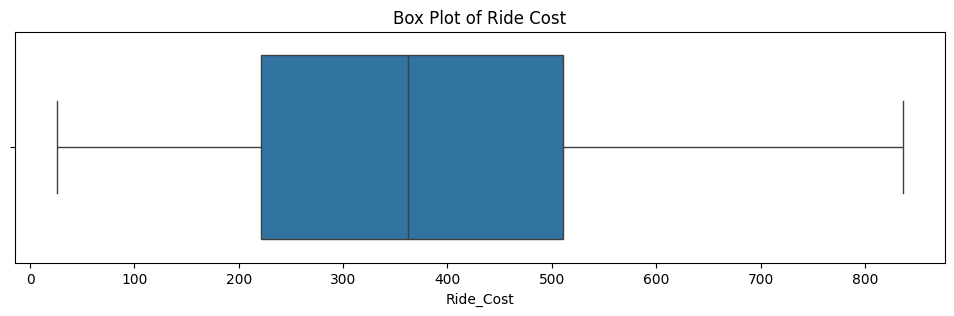

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt
# Box plot to visualize outliers in Ride_Cost
plt.figure(figsize=(12,3))
sns.boxplot(x=df['Ride_Cost'])
plt.title("Box Plot of Ride Cost")
plt.show()

No outliers in Ride_Cost means prices are within a normal range, ensuring consistent and stable pricing. 

Now, we will analyze how changes in Total_Drivers affect Ride_Cost.

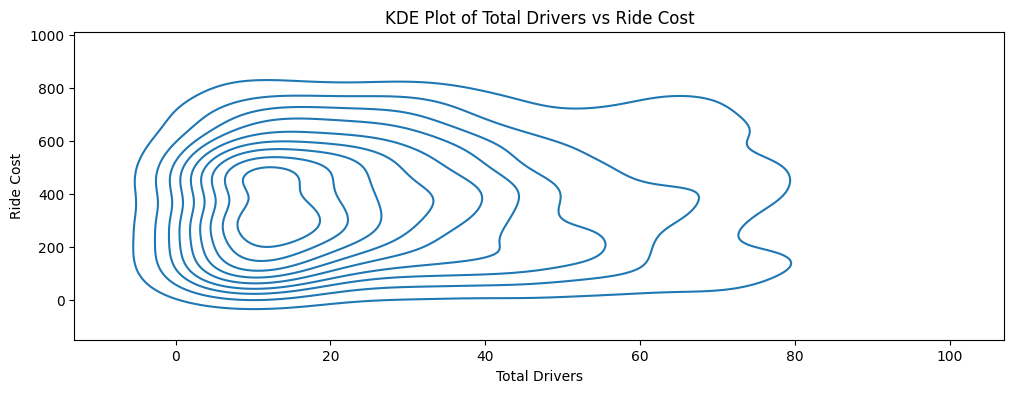

In [244]:
plt.figure(figsize=(12,4))
sns.kdeplot(data=df, x="Total_Drivers", y="Ride_Cost")
plt.title("KDE Plot of Total Drivers vs Ride Cost")
plt.xlabel("Total Drivers")
plt.ylabel("Ride Cost")
plt.show()

This analysis shows that the time of ride booking affects the cost. If the number of drivers is between 0 to 20, the ride cost is higher. When the number of drivers increases to 20-40, the ride cost decreases. As the driver count reaches 40-60, the cost further drops, and with 60-80 drivers, the ride cost becomes even lower.

We will categorize 0 to 20 drivers as Low, 20 to 40 as Medium, 40 to 60 as High, and 60+ drivers as Very High.

In [245]:
bins = [0, 20, 40, 60, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']
df['Driver_Category'] = pd.cut(df['Total_Drivers'], bins=bins, labels=labels)
df.drop(columns=['Total_Drivers'], inplace=True)

This categorization represents the number of drivers in different groups. After this, we will apply Label Encoding to make it suitable for the model.

In [246]:
df.head(1)

,Area_Type,Customer_Loyalty_Status,Customer_Past_Rides,Customer_Rating,Booking_Time,Car_Type,Ride_Duration,Ride_Cost,Driver_Category
0,Urban,Silver,13,4.0,Night,Premium,90,284.26,High


In [247]:
df["Customer_Rating"].value_counts()

Customer_Rating
4.0    675
5.0    325
Name: count, dtype: int64

Customer_Loyalty_Status and Customer_Rating are different features but have the same meaning, as both represent the customer's rating and connection with the company. Therefore, we will keep only one of them. Since Customer_Loyalty_Status is already categorized, we will drop Customer_Rating to avoid increasing model complexity.

In [248]:
df = df.drop(columns="Customer_Rating")

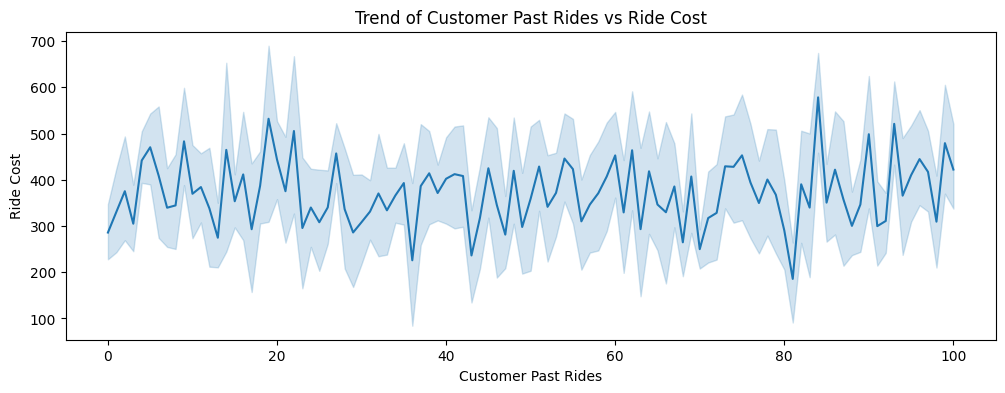

,Customer_Past_Rides,Ride_Cost
Customer_Past_Rides,1.000000,0.035859
Ride_Cost,0.035859,1.000000


In [249]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df, x="Customer_Past_Rides", y="Ride_Cost")
plt.title("Trend of Customer Past Rides vs Ride Cost")
plt.xlabel("Customer Past Rides")
plt.ylabel("Ride Cost")
plt.show()
df[['Customer_Past_Rides', 'Ride_Cost']].corr()

Customer_Past_Rides has minimal impact on Ride_Cost, as the price mostly remains in the range of 200-600 regardless of how many rides a customer has taken before.








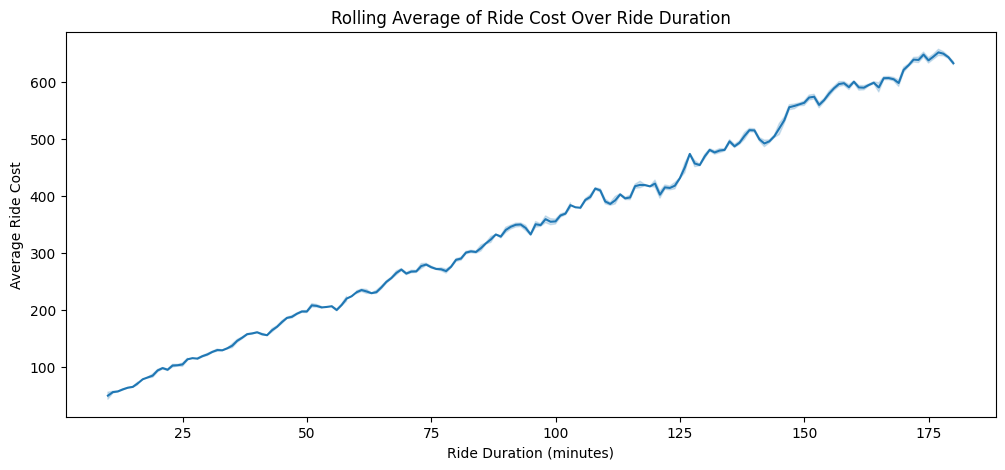

,Ride_Duration,Ride_Cost
Ride_Duration,1.000000,0.927547
Ride_Cost,0.927547,1.000000


In [250]:
df_sorted = df.sort_values("Ride_Duration")  
df_sorted["Rolling_Cost"] = df_sorted["Ride_Cost"].rolling(20, min_periods=1).mean() 
plt.figure(figsize=(12,5))
sns.lineplot(data=df_sorted, x="Ride_Duration", y="Rolling_Cost")
plt.title("Rolling Average of Ride Cost Over Ride Duration")
plt.xlabel("Ride Duration (minutes)")
plt.ylabel("Average Ride Cost")
plt.show()
df[['Ride_Duration', 'Ride_Cost']].corr()

Ride_Duration and Ride_Cost have a strong linear relationship, meaning as the duration increases, the cost also increases proportionally. Their correlation is 0.92, indicating a very strong positive association.

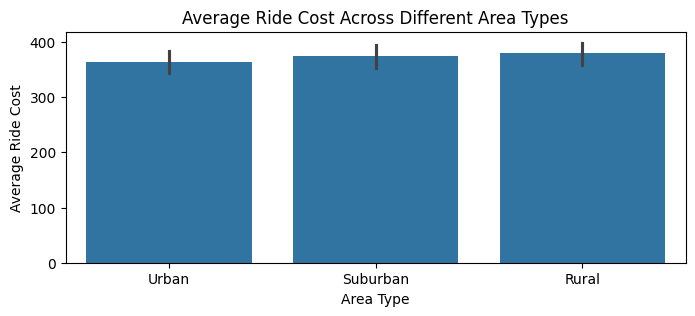

In [251]:
plt.figure(figsize=(8,3))
sns.barplot(data=df, x="Area_Type", y="Ride_Cost", estimator=np.mean)
plt.title("Average Ride Cost Across Different Area Types")
plt.xlabel("Area Type")
plt.ylabel("Average Ride Cost")
plt.show()

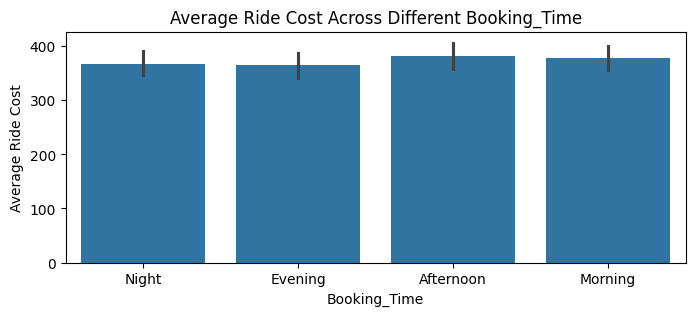

In [252]:
plt.figure(figsize=(8,3))
sns.barplot(data=df, x="Booking_Time", y="Ride_Cost", estimator=np.mean)
plt.title("Average Ride Cost Across Different Booking_Time")
plt.xlabel("Booking_Time")
plt.ylabel("Average Ride Cost")
plt.show()

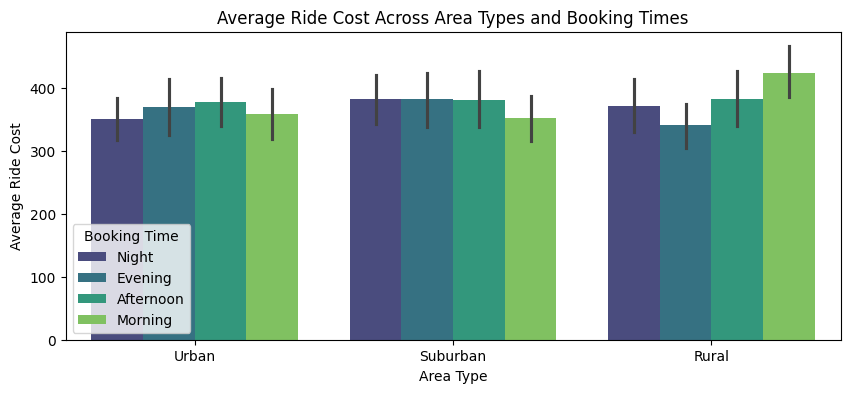

In [253]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x="Area_Type", y="Ride_Cost", hue="Booking_Time", estimator=np.mean ,  palette="viridis")
plt.title("Average Ride Cost Across Area Types and Booking Times")
plt.xlabel("Area Type")
plt.ylabel("Average Ride Cost")
plt.legend(title="Booking Time")
plt.show()

When i analyzed Area Type with Ride Cost, we found that the average cost difference across Urban, Suburban, and Rural areas is minimal but still meaningful.

Next, when we looked at Booking Time and its impact on cost, we observed that Afternoon and Morning rides tend to have slightly higher costs, while the other time slots show minor variations.

Finally, in our multivariate analysis of Average Ride Cost across Area Types and Booking Times, we noticed that in Rural areas, the average ride cost is higher in the Morning, while the trend varies across different area types. This indicates that both Area Type and Booking Time are valuable features for predicting Ride Cost.

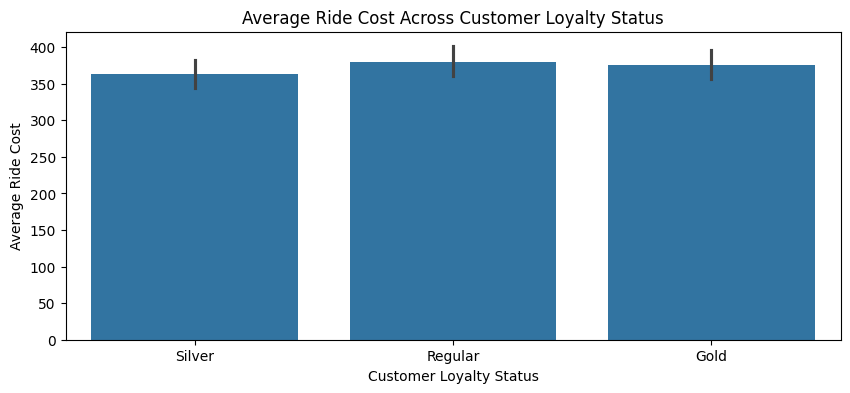

In [254]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x="Customer_Loyalty_Status", y="Ride_Cost", estimator=np.mean)
plt.title("Average Ride Cost Across Customer Loyalty Status")
plt.xlabel("Customer Loyalty Status")
plt.ylabel("Average Ride Cost")
plt.show()

We observed that among Customer Loyalty Status categories—Silver, Regular, and Gold—there isn't a significant difference in average ride cost. However, Silver customers tend to have a slightly lower average price compared to the others.

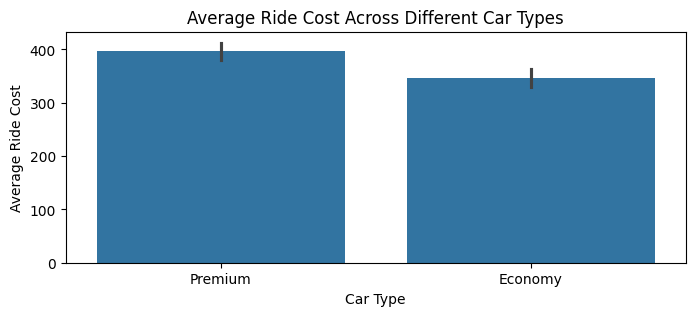

In [255]:
plt.figure(figsize=(8, 3))
sns.barplot(data=df, x="Car_Type", y="Ride_Cost", estimator=np.mean)
plt.title("Average Ride Cost Across Different Car Types")
plt.xlabel("Car Type")
plt.ylabel("Average Ride Cost")
plt.show()

I observed that premium car types have a higher ride cost compared to economy cars, meaning that if a customer chooses a premium cab, the price will be higher.

Now, we will perform feature transformation by applying scaling to numerical features and using One-Hot Encoding (OHE) or Label Encoding for categorical features based on their characteristics.

In [256]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

features = ["Customer_Loyalty_Status", "Booking_Time", "Car_Type", "Driver_Category"]
for i in features:
    df[i] = le.fit_transform(df[i])

In [257]:
df.sample(3)

,Area_Type,Customer_Loyalty_Status,Customer_Past_Rides,Booking_Time,Car_Type,Ride_Duration,Ride_Cost,Driver_Category
479,Rural,0,42,0,0,124,429.95,0
403,Urban,1,39,0,0,137,598.78,1
52,Rural,2,70,1,0,65,190.14,1


In [258]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop="first", dtype=int, sparse_output=False)
encoded = encoder.fit_transform(df[["Area_Type"]])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["Area_Type"]))

df = pd.concat([df.drop(columns=["Area_Type"]), encoded_df], axis=1)

In [259]:
df.sample(3)

,Customer_Loyalty_Status,Customer_Past_Rides,Booking_Time,Car_Type,Ride_Duration,Ride_Cost,Driver_Category,Area_Type_Suburban,Area_Type_Urban
514,2,83,2,1,173,622.49,0,0,1
529,0,92,0,1,111,517.94,2,0,1
109,1,90,3,1,42,211.53,1,0,1


In [260]:
df.isnull().sum().sum()

0

In [261]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["Customer_Past_Rides", "Ride_Duration", "Ride_Cost"]] = scaler.fit_transform(df[["Customer_Past_Rides", "Ride_Duration", "Ride_Cost"]])

In [262]:
df.head()

,Customer_Loyalty_Status,Customer_Past_Rides,Booking_Time,Car_Type,Ride_Duration,Ride_Cost,Driver_Category,Area_Type_Suburban,Area_Type_Urban
0,2,-1.263895,3,1,-0.195113,-0.471722,0,0,1
1,2,0.749818,1,0,-1.151547,-1.061837,2,1,0
2,2,-1.707594,0,1,-0.480008,-0.228277,2,0,0
3,1,0.579164,0,1,0.700273,0.522263,2,0,0
4,1,0.818079,0,0,1.005518,1.107514,2,0,0


In [263]:
df.corr()

,Customer_Loyalty_Status,Customer_Past_Rides,Booking_Time,Car_Type,Ride_Duration,Ride_Cost,Driver_Category,Area_Type_Suburban,Area_Type_Urban
Customer_Loyalty_Status,1.000000,0.035519,-0.007217,-0.005323,-0.038945,-0.030554,-0.000986,0.035404,-0.001747
Customer_Past_Rides,0.035519,1.000000,0.064281,-0.005615,0.030679,0.035859,-0.002488,0.030754,0.024988
Booking_Time,-0.007217,0.064281,1.000000,-0.011657,-0.012454,-0.017480,0.011731,-0.015849,0.043169
Car_Type,-0.005323,-0.005615,-0.011657,1.000000,0.012224,0.132640,0.027901,-0.017498,-0.006784
Ride_Duration,-0.038945,0.030679,-0.012454,0.012224,1.000000,0.927547,0.086513,0.003644,-0.032873
Ride_Cost,-0.030554,0.035859,-0.017480,0.132640,0.927547,1.000000,0.112307,0.006694,-0.034331
Driver_Category,-0.000986,-0.002488,0.011731,0.027901,0.086513,0.112307,1.000000,0.020331,0.035912
Area_Type_Suburban,0.035404,0.030754,-0.015849,-0.017498,0.003644,0.006694,0.020331,1.000000,-0.501259
Area_Type_Urban,-0.001747,0.024988,0.043169,-0.006784,-0.032873,-0.034331,0.035912,-0.501259,1.000000


I have transformed the features and checked the correlation. There are no issues, and the data is now ready for model building.

We will split the data into X (features) and y (target variable).

In [264]:
X = df.drop(columns=["Ride_Cost"])
y = df["Ride_Cost"] 

Now, we will split our data into training and testing sets to evaluate the model's performance on unseen data.

In [265]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 8), (200, 8), (800,), (200,))

In [266]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_train)

r2 = r2_score(y_train, y_pred)

rmse = np.sqrt(mean_squared_error(y_train, y_pred))

print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

R² Score: 0.8763269631951948
RMSE: 0.3497440763075519


In [267]:
y_test_pred = model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Test R² Score: {r2_test}")
print(f"Test RMSE: {rmse_test}")

Test R² Score: 0.8730638008394722
Test RMSE: 0.3636747170739174


In [177]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [120, 160 ,180, 200],
    'learning_rate': [0.01, 0.02, 0.1],
    'max_depth': [1 ,2 ,3],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 8, 10],
    'min_samples_leaf': [3, 4,5 ],
    'max_features': ['auto', 'sqrt', 'log2']
}

gbr = GradientBoostingRegressor()

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4320 fits failed out of a total of 12960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1774 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", li

Best Parameters: {'learning_rate': 0.1, 'max_depth': 1, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}


In [268]:
# Best parameters se Gradient Boosting model initialize karna
gbr_best = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=1,
    max_features='log2',
    min_samples_leaf=3,
    min_samples_split=2,
    n_estimators=200,
    subsample=0.8
)

gbr_best.fit(X_train, y_train)

y_train_pred = gbr_best.predict(X_train)

r2 = r2_score(y_train, y_train_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f"Train R² Score: {r2}")
print(f"Train RMSE: {rmse}")

Train R² Score: 0.8854290668098486
Train RMSE: 0.3366278785828096


In [269]:
# Test data pe predictions
y_test_pred = gbr_best.predict(X_test)

# Performance metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Test R² Score: {test_r2}")
print(f"Test RMSE: {test_rmse}")


Test R² Score: 0.861774063646743
Test RMSE: 0.3795029313887492


I initially chose Linear Regression, which performed well on both train and test data:

Train R²: 0.8763, Test R²: 0.8730
Train RMSE: 0.3497, Test RMSE: 0.3637

After hyperparameter tuning, Gradient Boosting showed:

Train R²: 0.8850, Test R²: 0.8621
Train RMSE: 0.3371, Test RMSE: 0.3789

Compared to Linear Regression, Gradient Boosting appears slightly off, indicating overfitting. Further tuning and optimization wouldn’t make much difference and could worsen the model, as we have limited data (only around 1000 rows). For this dataset, Linear Regression remains the best choice.